<a href="https://colab.research.google.com/github/sam-thurman/asl_alphabet_image_classification/blob/master/notebooks/model_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
import pandas as pd
import numpy as np
import scipy as math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# from PIL import Image

from sklearn.model_selection import train_test_split
import keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Model, Sequential
from keras import layers
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras import optimizers
from keras.optimizers import Adam
from keras.models import load_model

import tensorflow as tf

import sys
import os


Using TensorFlow backend.


Notebook running: keras  2.3.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [0]:
warnings.filterwarnings('ignore')

model8 = load_model('model8.h5')

In [0]:
!pip install lime

     |████████████████████████████████| 276kB 2.6MB/s 
     |████████████████████████████████| 2.0MB 46.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=03e6c77cd1fb9fec427df415d4775de87b7514798d3e1d09e50201978c0964b4
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
Successfully built lime
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [0]:
train_path = 'data/asl_alphabet_train'
validation_path = 'data/asl_alphabet_validation'
sam_path = 'data/asl_extra_val'
image_size = 200
batch_size = 32
valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
val_generator = valgen.flow_from_directory(
                validation_path,  # directory for validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical',
                color_mode='rgb',
                shuffle=False)

samgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=(lambda x: tf.image.central_crop(x, central_fraction=1)))
sam_generator = samgen.flow_from_directory(
                sam_path,  # directory for me-made validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical',
                color_mode='rgb',
                shuffle=False)

Found 30 images belonging to 29 classes.
Found 29 images belonging to 29 classes.


In [0]:
import lime
import lime.lime_image

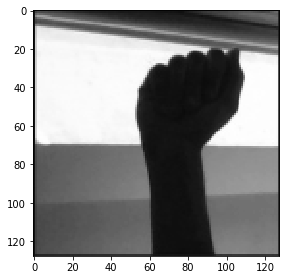

In [0]:
data_path = 'data/asl_alphabet_validation/'
Xi = skimage.io.imread(os.path.join(data_path, 'A/A_test.jpg'))
from skimage.color import rgb2gray
Xi = rgb2gray(Xi)
Xi = skimage.transform.resize(Xi, (128,128)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

In [0]:
model8.predict(np.expand_dims(np.expand_dims(Xi, axis=2), axis=0))

ValueError: ignored

In [0]:
Xi.shape

(128, 128)

In [0]:
explainer = lime.lime_image.LimeImageExplainer()

In [0]:
def predict(image):
  # image = np.expand_dims(image, axis=2)
  # return model3.predict(np.expand_dims(np.expand_dims(image, axis=2), axis=0))
  image = np.expand_dims(np.expand_dims(image, axis=2), axis=0)
  return model3.predict(image.reshape(1,-1))
explanation = explainer.explain_instance(Xi, predict)

ValueError: ignored